# Agrupar los clientes por en busqueda de un deposito bancario

Kmeans es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Es un método utilizado en minería de datos.

- Kmeans

### Autores
   * Efrén Jiménez

## Análisis del Problema

El telemarketing se inició por primera vez para que los clientes se familiarizaran con los productos / servicios que ofrece una empresa y para que los clientes compraran ese producto / servicio. Esto llevó a ayudar a la empresa del sector bancario a aumentar su número de clientes al establecer interés en ellos con algunas ofertas atractivas que no podían rechazarse. Esto llevó a los bancos a comercializar sus depósitos a plazo con los clientes.

Este proyecto considera datos reales de una campaña de Tele-Marketing que fue realizada por un banco portugués de mayo de 2008 a noviembre de 2010.

![blackbell](https://storage.googleapis.com/kaggle-datasets-images/new-version-temp-images/default-backgrounds-86.png-3984338/dataset-cover.png)

### Librerías

In [148]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install sklearn

Processing c:\users\efren\appdata\local\pip\cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074\sklearn-0.0-py2.py3-none-any.whl


In [149]:
import warnings
warnings.filterwarnings('ignore')
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Entendimiento de los Datos

El total es de 4119 registro con 21 columnas dentro del set de datos de entrenamiento

- age (numeric)
- job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
- marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
- education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
- default: has credit in default? (categorical: "no","yes","unknown")
- housing: has housing loan? (categorical: "no","yes","unknown")
- loan: has personal loan? (categorical: "no","yes","unknown")

   # related with the last contact of the current campaign:
- contact: contact communication type (categorical: "cellular","telephone") 
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
- duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

   # other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   
   # social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

- y - has the client subscribed a term deposit? (binary: "yes","no"

In [150]:
#Cargar los datos
bank_clients = pd.read_csv(r"data/bank-additional.csv",na_values='?',sep=';')

In [151]:
bank_clients.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [152]:
bank_clients=bank_clients.drop(
    columns=['nr.employed']) 

In [153]:
#Primeros registros
bank_clients.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,no


In [154]:
#Describir dataset
bank_clients.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000


In [120]:
#Información del dataset
bank_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [155]:
# Numero de registros del dataset
print("Cantidad de registros:",len(bank_clients))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(bank_clients.columns))
# Tipos de datos del dataset
print("Tipo de datos:",bank_clients.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",bank_clients.shape)

Cantidad de registros: 4119
Cantidad de columnas: 20
Tipo de datos: [dtype('int64') dtype('O') dtype('float64')]
Filas y columnas: (4119, 20)


In [156]:
# Chekear valores nulos
print(bank_clients.isnull().any().sum(), ' / ', len(bank_clients.columns))

0  /  20


In [157]:
#Cuales columnnas estas con valores nulos
bank_clients.isnull().sum()[bank_clients.isnull().sum() > 0]

Series([], dtype: int64)

In [158]:
# N/A= Valores vacios 
#Usar solo si se quiere eliminar los registros que contienen columnas vacías
bank_clients=bank_clients.dropna() 

In [159]:
bank_clients

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,no


In [160]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

bank_clients["age"] =le.fit_transform(bank_clients["age"])
bank_clients["job"] =le.fit_transform(bank_clients["job"])  
bank_clients["marital"] =le.fit_transform(bank_clients["marital"])  
bank_clients["education"] =le.fit_transform(bank_clients["education"])  
bank_clients["default"] =le.fit_transform(bank_clients["default"])  
bank_clients["housing"] =le.fit_transform(bank_clients["housing"])  
bank_clients["loan"] =le.fit_transform(bank_clients["loan"])  
bank_clients["contact"] =le.fit_transform(bank_clients["contact"])  
bank_clients["month"] =le.fit_transform(bank_clients["month"])  
bank_clients["day_of_week"] =le.fit_transform(bank_clients["day_of_week"])  
bank_clients["duration"] =le.fit_transform(bank_clients["duration"])  
bank_clients["campaign"] =le.fit_transform(bank_clients["campaign"])  
bank_clients["pdays"] =le.fit_transform(bank_clients["pdays"])  
bank_clients["previous"] =le.fit_transform(bank_clients["previous"]) 
bank_clients["poutcome"] =le.fit_transform(bank_clients["poutcome"])  
bank_clients["emp.var.rate"] =le.fit_transform(bank_clients["emp.var.rate"])  
bank_clients["cons.price.idx"] =le.fit_transform(bank_clients["cons.price.idx"])  
bank_clients["cons.conf.idx"] =le.fit_transform(bank_clients["cons.conf.idx"])  
bank_clients["euribor3m"] =le.fit_transform(bank_clients["euribor3m"])  

## Exploración de los Datos

#### Gráficos exploratorios

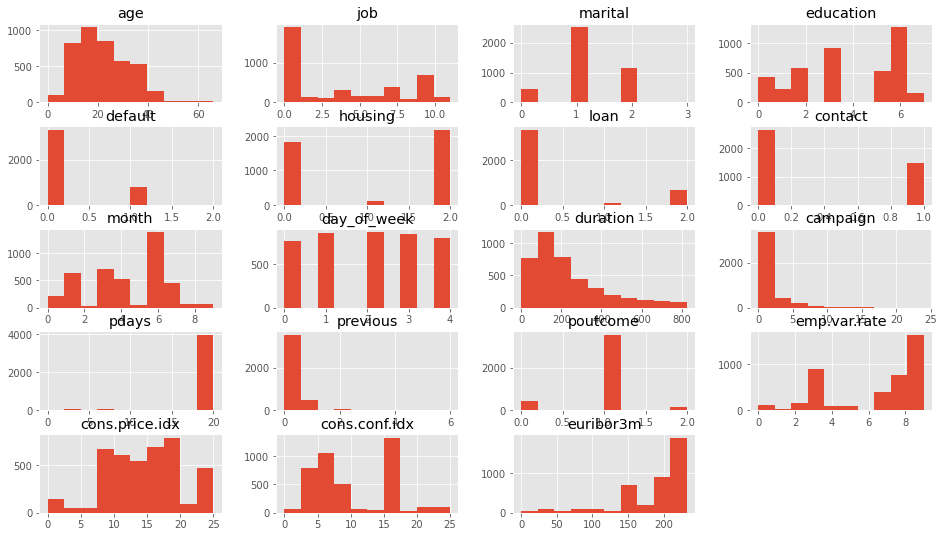

In [161]:
bank_clients.hist()
plt.show()

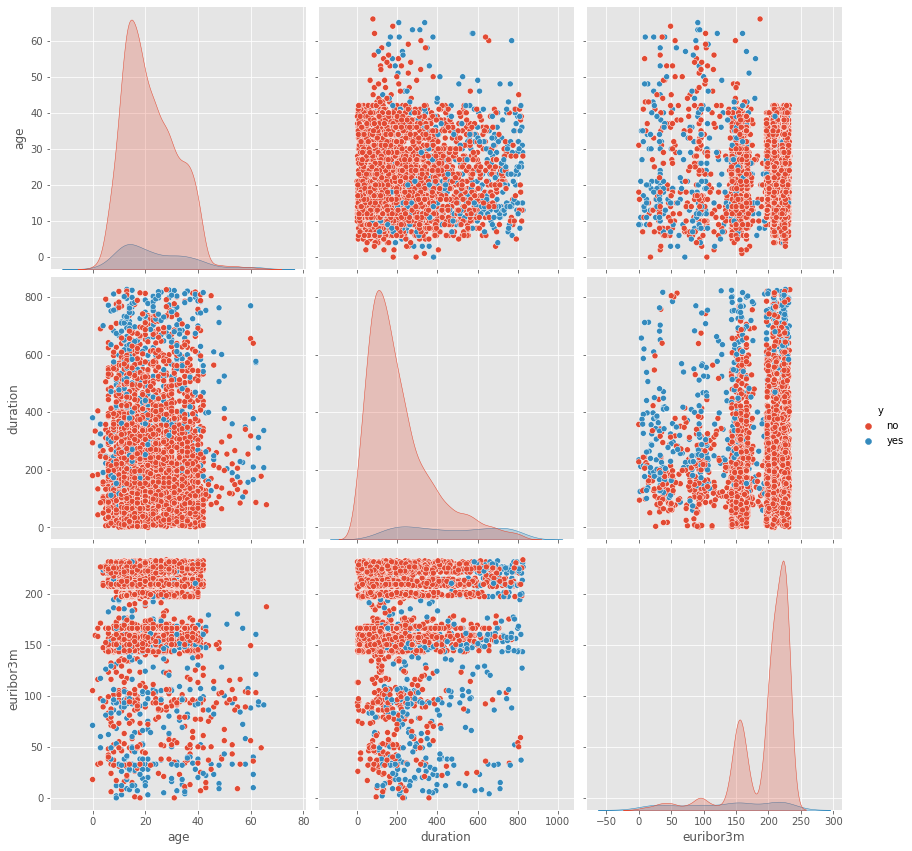

In [162]:
sb.pairplot(bank_clients, hue='y',size=4,vars=["age","duration","euribor3m"],kind='scatter')

## Obtener el valor K

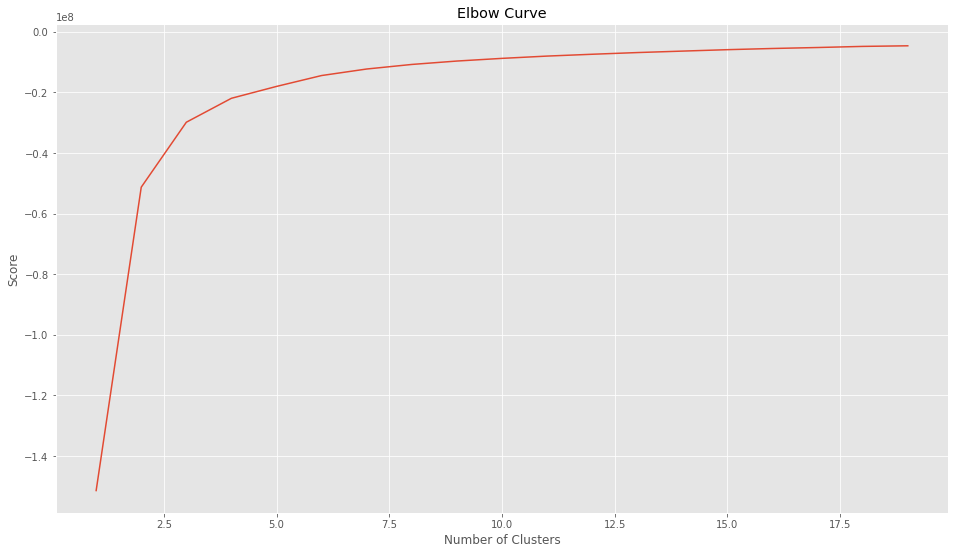

In [163]:
X=bank_clients[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m']]

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [164]:
## Modelo de Machine Learning

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

In [165]:

#Kmeans
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.17085714e+01 3.80571429e+00 1.17396825e+00 3.69206349e+00
  2.17142857e-01 1.07619048e+00 3.66349206e-01 3.75238095e-01
  4.14285714e+00 1.97269841e+00 8.36158730e+01 2.05142857e+00
  1.99022222e+01 9.84126984e-02 9.22539683e-01 7.19238095e+00
  1.46984127e+01 9.66412698e+00 2.02620952e+02]
 [2.23057229e+01 3.77861446e+00 1.18072289e+00 3.71987952e+00
  2.21385542e-01 1.11295181e+00 2.87650602e-01 3.28313253e-01
  4.34789157e+00 2.03765060e+00 3.95237952e+02 1.11746988e+00
  1.92680723e+01 2.19879518e-01 9.27710843e-01 6.31024096e+00
  1.41400602e+01 9.97740964e+00 1.83543675e+02]
 [2.30904645e+01 3.78239609e+00 1.19070905e+00 3.77017115e+00
  1.76039120e-01 1.00977995e+00 3.44743276e-01 3.37408313e-01
  4.31784841e+00 2.03178484e+00 6.59430318e+02 1.44987775e+00
  1.93374083e+01 1.95599022e-01 9.38875306e-01 6.62102689e+00
  1.46063570e+01 9.54278729e+00 1.87933985e+02]
 [2.15949367e+01 3.73670886e+00 1.15189873e+00 3.72067511e+00
  1.98312236e-01 1.08691983e+00 3.67932489e-01 4.0

## Evaluación

In [166]:
# Kmeans
labels = kmeans.predict(X)

In [167]:
labels

array([1, 1, 3, ..., 0, 1, 3])

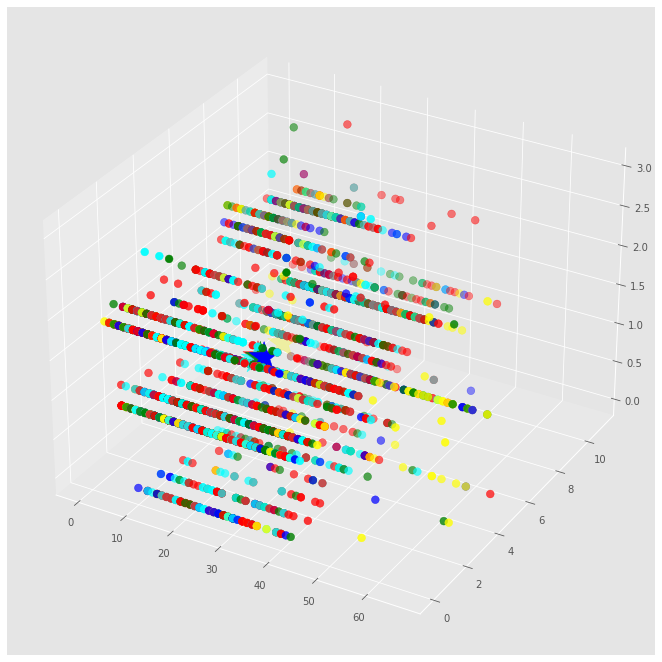

In [168]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

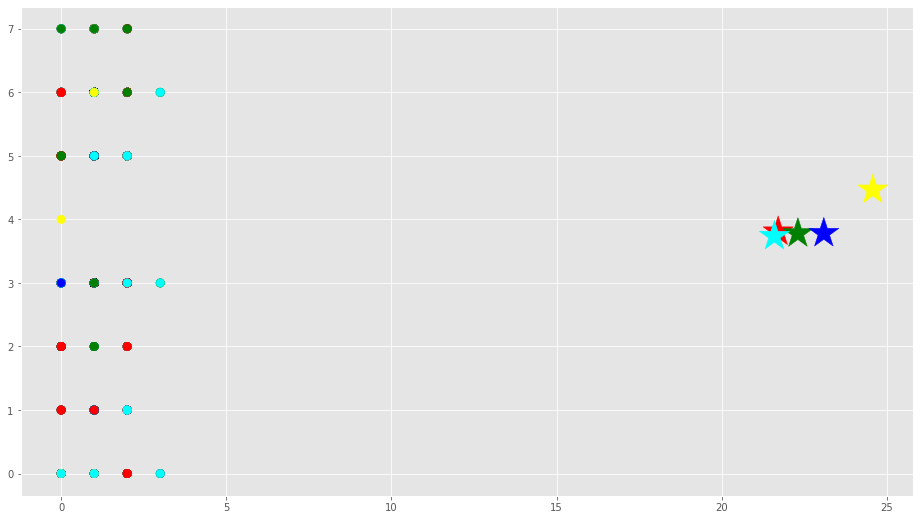

In [169]:
# Getting the values and plotting it
f1 = X['marital'].values
f2 = X['education'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [170]:
copy =  pd.DataFrame()
copy['client']= num=np.arange(labels.shape[0])
copy['label'] = labels;
copy

,client,label
0,0,1
1,1,1
2,2,3
3,3,0
4,4,0
...,...,...
4114,4114,0
4115,4115,3
4116,4116,0
4117,4117,1


## Resultados
En conclusión, los valores obtenidos por la agrupación es de la al menos 5 grupos, por lo cual se recomienda limpiar algunas variables para visualizar mejor los valores.